<a href="https://colab.research.google.com/github/JuanJoseCardenas/Modelado-y-simulaci-n/blob/master/Proyecto_mdeladoysimulacion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

##ANÁLISIS A LA ECUACIÓN LOGÍSTICA DE UNA POBLACIÓN



---

https://www.youtube.com/watch?v=EOvLhZPevm0&t=13s

Juan José Cárdenas Osorio - 1053871534


**Para mejor visualización de documento, abrir desde Colab. **


El siguiente archivo está basado en información proveniente de internet y un vídeo. Se analizará una ecuación que es capaz de escribir el crecimiento de una población de conejos, también puede ser utilizado para describir la cantidad de gotas que caen de un grifo semi-abierto en un instante de tiempo. 

Lo anterior se puede resumir en la siguiente ecuación:

<center>

${y=r*x*(1-x)}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from math import log

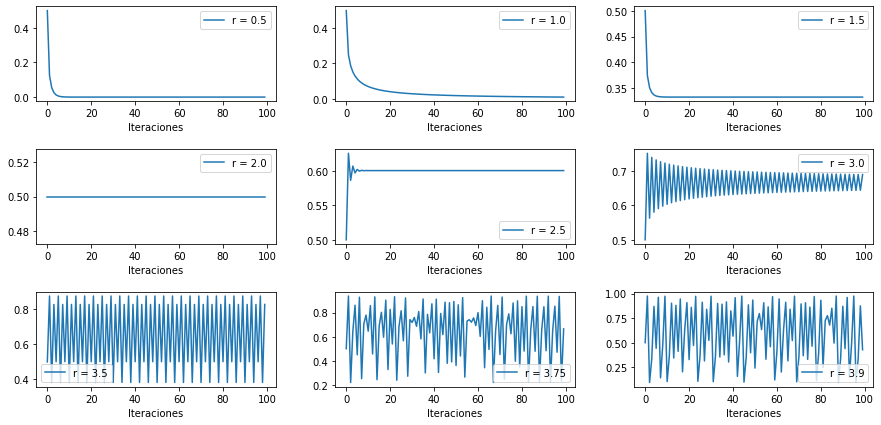

In [ ]:

rs=[0.5*i for i in range(1,8)]  #Valores de r
rs.extend([3.75, 3.9])  #Agregamos un par de valores extra.
n=100   #Graficamos 100 puntos para cada r.
x0=0.01   #Valor inicial de xn
fig=plt.figure(figsize=(15,7))
ordenadas=range(n)
for j, r in enumerate(rs):
    xns=[x0]
    for i in range(n-1):
        xns.append(r*xns[i]*(1-xns[i]))
    plt.subplot(int('33'+str(j+1)))
    plt.plot(ordenadas, xns, label=f'r = {r}')
    plt.xlabel('Iteraciones')
    plt.ylabel('')

    plt.legend()
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

Antes de comenzar con el análisis gráfico, en principio se tiene que el paso de tiempo será tomado como 1 año y R es el índice de natalidad de una población de conejos. 

Partiendo de las gráficas obtenidas, se puede decir que:

*   Cuando 0<R<2, la población tiende a su extinción. 
*   Cuando 2<R<3, la población tiende a crecer hasta estabilizarse en un punto. 
*   Cuando R=3, se tiene un caso especial donde la población tiende a número de población repetitivo con un periodo de 2. 

Ahora, realizando el análisis matemático a este estudio se tiene que:

*   Para 0<R<2, hay un punto atractor en 0. 
*   Cuando 2<R<3, tiene un punto de equilibrio en un valor.
*   Cuando R=3, se presume una bifurcación tipo tridente.

Para plazmar mejor lo anterior, se realiza el diagrama de bifurcación:

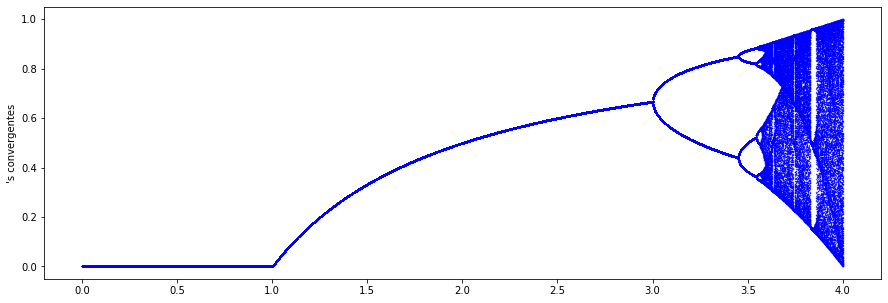

In [ ]:
x0=0.01  #Población inicial
n=10000  #Numero total de iteraciones
ultimos=100  #Términos que consideraremos.
r=0
fig=plt.figure(figsize=[15,5])
while r<8: 
    xns=[x0]   #Lista donde se guardan los elementos de la sucesión.
    for i in range(n):
        xns.append(r*xns[i]*(1-xns[i]))
    r+=0.005
    xfinales=xns[n-ultimos:]    #Ultimos 50 valores de la sucesión.
    rs=[r for xs in xfinales]    #Lista con r repetido 50 veces.    
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.1)
    
plt.xlabel('')
plt.ylabel('\'s convergentes')
plt.show()

Ahora, al analizar detalladamente la gráfica de bifurcación, se puede observar que:

*      Cuando 0<R<1, el sistema tiende a 0. 
*      Cuando 1<R<3, el sistema tiende a estabilizarse en algún punto. 
*      Cuando 3<R<3.5, el sistema entra dentro de una bifurcación tipo tridente que oscila entre dos valores.
*      Para 3.5<R<3.6, se tiene otra bifurcación tipo tridente que oscila en 4 periodos. 
*      Para valores de R>3.6, el sistema entra en caos. 

Además, se puede observar que en un valor aproximado de 3.8, el sistema es lineal. 

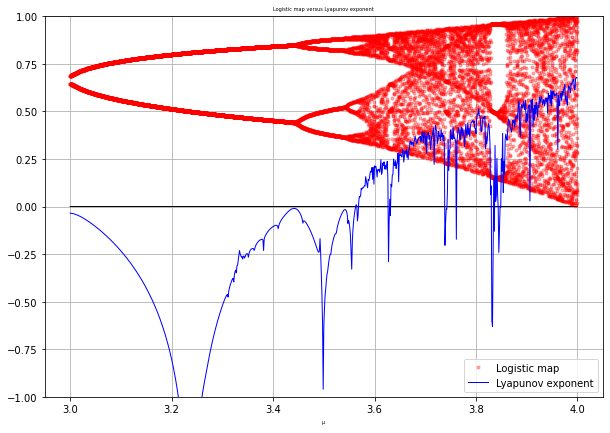

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_points = 16000;
result = []
lambdas = []
maps = []
xmin, xmax = 3, 4
mult=(xmax-xmin)*num_points
mu_values = np.arange(xmin, xmax, 20/num_points)
for r in mu_values:
  x = 0.1
  result = []
  for t in range(100):
    x = r * x * (1 - x)
    result.append(np.log(abs(r - 2*r*x)))
  lambdas.append(np.mean(result))
    # Ignore first 100 iterates.
  for t in range(20):
    x = r * x * (1 - x)
    maps.append(x)
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(xmin, xmax, mult)
zero = [0] * mult
ax1.plot(xticks, zero, 'k-', linewidth=1)
ax1.plot(xticks, maps, 'r.', alpha = 0.3, label='Logistic map')
ax1.set_xlabel('r')
ax1.plot(mu_values, lambdas, 'b-', linewidth=1,
label='Lyapunov exponent')
ax1.grid('on')
ax1.set_ylim(-1, 1)
ax1.set_xlabel('$\mu$', fontsize=5)
ax1.legend(loc='best')
ax1.set_title('Logistic map versus Lyapunov exponent', fontsize=5)
plt.show()

En esta gráfica de los exponentes Lyapunov vs la ecuación logística (conejos), se puede observar que la variación pico de los exponentes es menor cuando los valores de R no están en caos y cuando hay una bifurcación el valor de los exponentes decrece. 

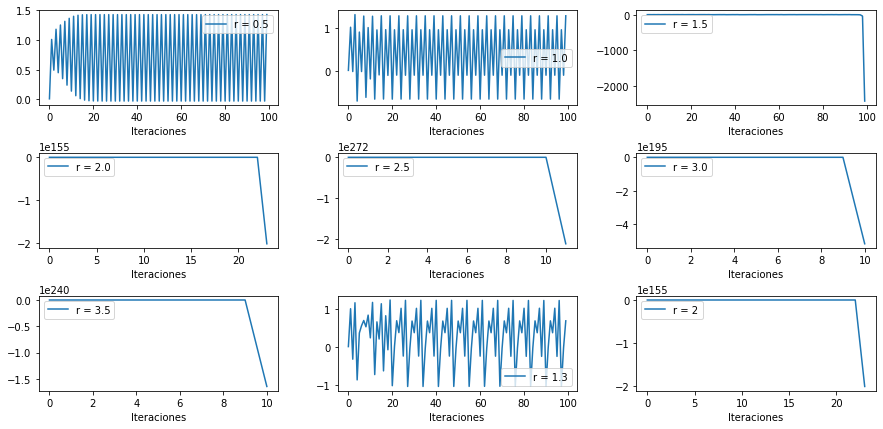

In [ ]:

rs=[0.5*i for i in range(1,8)]  #Valores de r
rs.extend([1.3, 2])  #Agregamos un par de valores extra.
n=100   #Graficamos 100 puntos para cada r.
x0=0.01   #Valor inicial de xn
y0=0.01
b=0.3
fig=plt.figure(figsize=(15,7))
ordenadas=range(n)
for j, r in enumerate(rs):
    xns=[x0]
    yns=[y0]
    for i in range(n-1):
        xns.append(yns[i] - r*xns[i]*xns[i] + 1)
        yns.append(b*xns[i])
    plt.subplot(int('33'+str(j+1)))
    plt.plot(ordenadas, xns, label=f'r = {r}')
    plt.xlabel('Iteraciones')
    plt.ylabel('')

    plt.legend()
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.show()

Ahora, para este caso se hace un análisis similar al realizado anteriormiente, pero en este caso con la ecuación de Henón, la cual es similar a la ecuación de Lorentz pero para sistemas bidimensionales. 

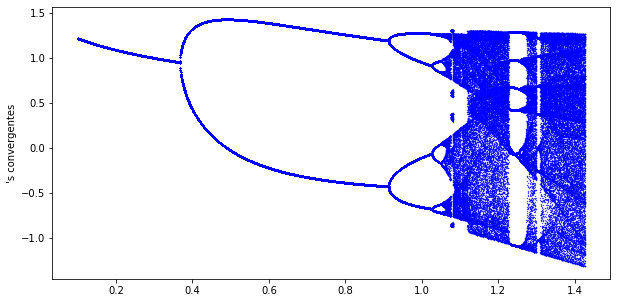

In [ ]:
x0=0.01 
            #Población inicial
n=20000  #Numero total de iteraciones
ultimos=100  #Términos que consideraremos.
r=0.1
b=0.3
fig=plt.figure(figsize=[10,5])
while r<8: 
    xns1=[x0]
    yns1=[y0]   #Lista donde se guardan los elementos de la sucesión.
    for i in range(n):
        xns1.append(yns1[i] - r*xns1[i]*xns1[i] + 1)
        yns1.append(b*xns1[i])    
    r+=0.0005
    xfinales=xns1[n-ultimos:]    #Ultimos 50 valores de la sucesión.
    rs=[r for xs in xfinales]    #Lista con r repetido 50 veces.    
    plt.scatter(rs, xfinales, c='b', marker='o', s=0.1)
    
plt.xlabel('')
plt.ylabel('\'s convergentes')
plt.show()

Para este caso, se observa que: 

*   Para valores de 0<R<0.28, el sistema converge hacia un valor.
*   Para valores de 0.28<R<0.92, el sistema entra a una bifurcación tipo tridente de periodo 2. 
*   Para valores de 0.92<R<1, el sistema entra a una bifurcación tipo tridente de periodo 4. 
*   Para valores de 1<R<1.2, el sistema entra en caos. 
*   Para valores de 1.2<R<1.25, dentro del caos el sistema vuelve a una región lineal que se observa mucho mejor que en la gráfica de bifurcación anterior (conejos). 
